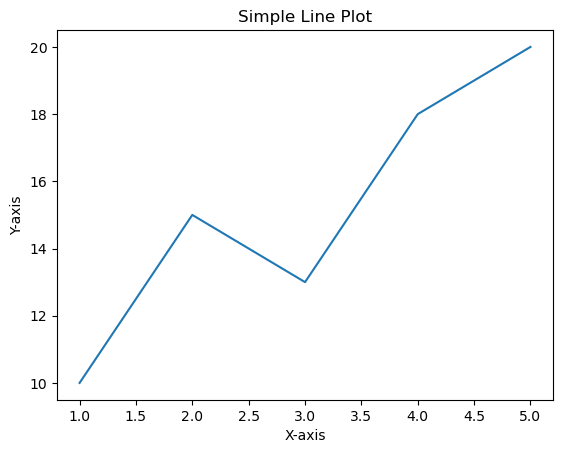

In [2]:
# Testing to make sure everything is working lol
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 15, 13, 18, 20]

# Create a basic line plot
plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Line Plot')
plt.show()

In [4]:
import pandas as pd

# Read the CSV files into DataFrames
study_results = pd.read_csv("Study_results.csv")
mouse_meta = pd.read_csv("Mouse_metadata.csv")

# Check the first few rows of the DataFrames
print(study_results.head())
print(mouse_meta.head())

merge_df = pd.merge(study_results, mouse_meta, how="left", on=["Mouse ID", "Mouse ID"])
merge_df.head()

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
count_unique_values = merge_df["Mouse ID"].nunique()
print("Total Number of Mice:", count_unique_values)

Total Number of Mice: 249


In [6]:
duplicates = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"])]

# Get the unique Mouse IDs that have duplicate entries
duplicate_mice = duplicates["Mouse ID"].unique()

# Print the duplicate Mouse IDs
print("Duplicate Mouse IDs:")
print(duplicate_mice)

Duplicate Mouse IDs:
['g989']


In [13]:
import pandas as pd

# Read the CSV files into DataFrames
study_results = pd.read_csv("Study_results.csv")
mouse_meta = pd.read_csv("Mouse_metadata.csv")

# Merge the data using the correct common column "Mouse ID"
merge_df = pd.merge(study_results, mouse_meta, on="Mouse ID", how="left")

# Calculate the total number of unique Mouse IDs before dropping the specific mouse
count_unique_values_before = merge_df["Mouse ID"].nunique()
print("Total Number of Mice before dropping the specific mouse:", count_unique_values_before)

# Specify the Mouse ID you want to drop
mouse_to_drop = "g989"

# Drop all rows related to the specified Mouse ID
merge_df = merge_df[merge_df["Mouse ID"] != mouse_to_drop]

# Calculate the total number of unique Mouse IDs after dropping the specific mouse
count_unique_values_after = merge_df["Mouse ID"].nunique()
print("Total Number of Mice after dropping the specific mouse:", count_unique_values_after)

Total Number of Mice before dropping the specific mouse: 249
Total Number of Mice after dropping the specific mouse: 248


In [14]:
import pandas as pd

# Read the CSV files into DataFrames
study_results = pd.read_csv("Study_results.csv")
mouse_meta = pd.read_csv("Mouse_metadata.csv")

# Merge the data using the correct common column "Mouse ID"
merge_df = pd.merge(study_results, mouse_meta, on="Mouse ID", how="left")

# Calculate the total number of unique Mouse IDs before dropping the specific mouse
count_unique_values_before = merge_df["Mouse ID"].nunique()
print("Total Number of Mice before dropping the specific mouse:", count_unique_values_before)

# Specify the Mouse ID you want to drop
mouse_to_drop = "g989"

# Drop all rows related to the specified Mouse ID
merge_df = merge_df[merge_df["Mouse ID"] != mouse_to_drop]
grouped_df = merge_df.groupby("Drug Regimen")

# Calculate mean, median, variance, standard deviation, and SEM for the tumor volume in each group
summary_stats_df = grouped_df["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats_df = summary_stats_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Display the summary statistics DataFrame
print(summary_stats_df)

Total Number of Mice before dropping the specific mouse: 249
              Mean Tumor Volume  Median Tumor Volume   Variance  \
Drug Regimen                                                      
Capomulin             40.675741            41.557809  24.947764   
Ceftamin              52.591172            51.776157  39.290177   
Infubinol             52.884795            51.820584  43.128684   
Ketapril              55.235638            53.698743  68.553577   
Naftisol              54.331565            52.509285  66.173479   
Placebo               54.033581            52.288934  61.168083   
Propriva              52.320930            50.446266  43.852013   
Ramicane              40.216745            40.673236  23.486704   
Stelasyn              54.233149            52.431737  59.450562   
Zoniferol             53.236507            51.818479  48.533355   

              Standard Deviation       SEM  
Drug Regimen                                
Capomulin               4.994774  0.329346  

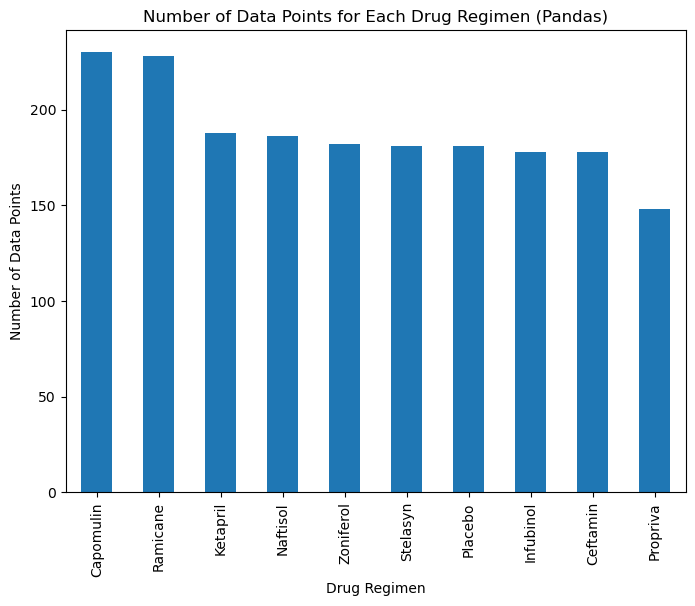

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already read the data into a DataFrame (merge_df)

# Group the data by the "Drug Regimen" column and count the number of data points in each group
regimen_counts = merge_df['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
regimen_counts.plot(kind='bar', figsize=(8, 6))
plt.title("Number of Data Points for Each Drug Regimen (Pandas)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

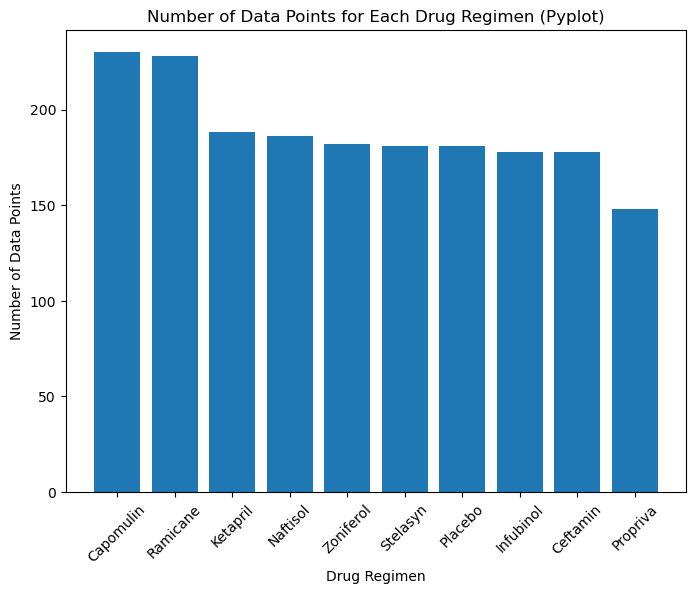

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already read the data into a DataFrame (merge_df)

# Group the data by the "Drug Regimen" column and count the number of data points in each group
regimen_counts = merge_df['Drug Regimen'].value_counts()

# Create a bar plot using Matplotlib's pyplot
plt.figure(figsize=(8, 6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title("Number of Data Points for Each Drug Regimen (Pyplot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

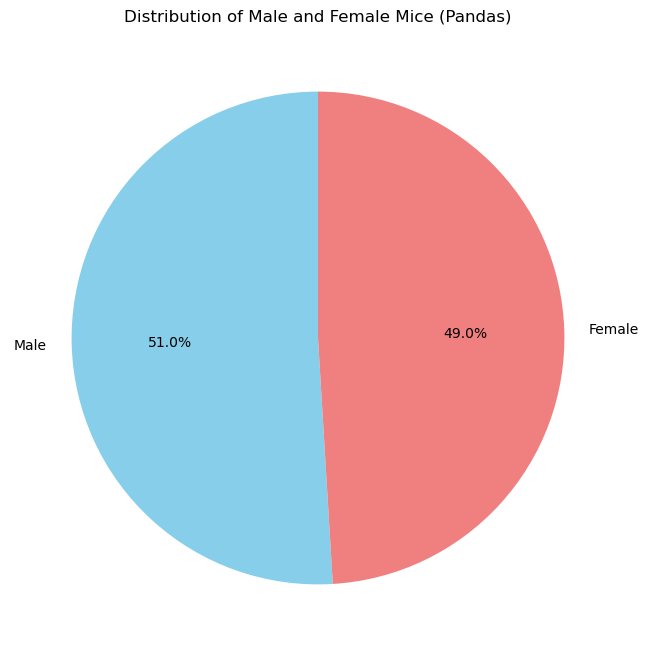

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already read the data into a DataFrame (merge_df)

# Group the data by the "Sex" column and count the number of male and female mice
gender_counts = merge_df['Sex'].value_counts()

# Create a pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90, figsize=(8, 8))
plt.title("Distribution of Male and Female Mice (Pandas)")
plt.ylabel('')
plt.show()

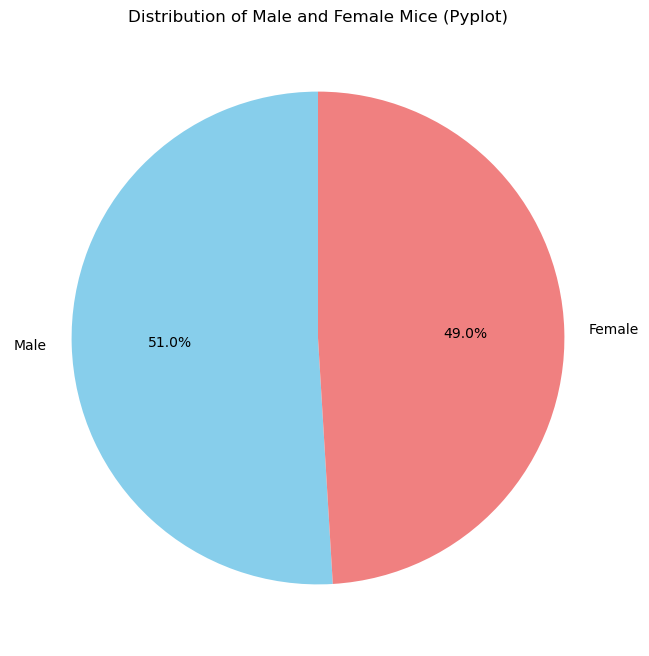

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already read the data into a DataFrame (merge_df)

# Group the data by the "Sex" column and count the number of male and female mice
gender_counts = merge_df['Sex'].value_counts()

# Create a pie chart using Matplotlib's pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title("Distribution of Male and Female Mice (Pyplot)")
plt.show()

In [19]:
import pandas as pd

# Assuming you have already read the data into a DataFrame (merge_df)

# Create a DataFrame to store the last timepoint for each mouse
last_timepoint_df = merge_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last_timepoint_df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(merge_df, last_timepoint_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Filter the data for the specified treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(specified_regimens)]

# Display the DataFrame with the final tumor volume for each mouse
print(final_tumor_volume_df)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
7       u153          0           45.000000                 0     Ceftamin   
8       b447          0           45.000000                 0     Ceftamin   
10      x226          0           45.000000                 0     Ceftamin   
11      t573          0           45.000000                 0     Ceftamin   
20      c326          5           36.321346                 0    Infubinol   
..       ...        ...                 ...               ...          ...   
234     a644         45           32.978522                 1     Ramicane   
240     i177         45           33.562402                 3     Ramicane   
243     r944         45           41.581521                 2    Capomulin   
244     u364         45           31.023923                 3    Capomulin   
245     p438         45           61.433892                 1     Ceftamin   

        Sex  Age_months  Weight (g)  
7    Female          11  

In [20]:
import pandas as pd

# Assuming you have already read the data into a DataFrame (final_tumor_volume_df)

# Put the treatment regimens into a list for a for loop and plot labels
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for plotting
tumor_volume_data = []

# Loop through each treatment regimen and calculate the IQR and identify potential outliers
for regimen in treatment_regimens:
    # Filter the data for the current regimen
    regimen_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Append the tumor volume data for the current regimen to the list
    tumor_volume_data.append(regimen_data)
    
    # Calculate the IQR for the current regimen
    quartiles = regimen_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers for the current regimen
    potential_outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    # Print information about potential outliers for the current regimen
    print(f"Potential outliers for {regimen}: {potential_outliers.tolist()}")

Potential outliers for Capomulin: []
Potential outliers for Ramicane: []
Potential outliers for Infubinol: [36.3213458]
Potential outliers for Ceftamin: []


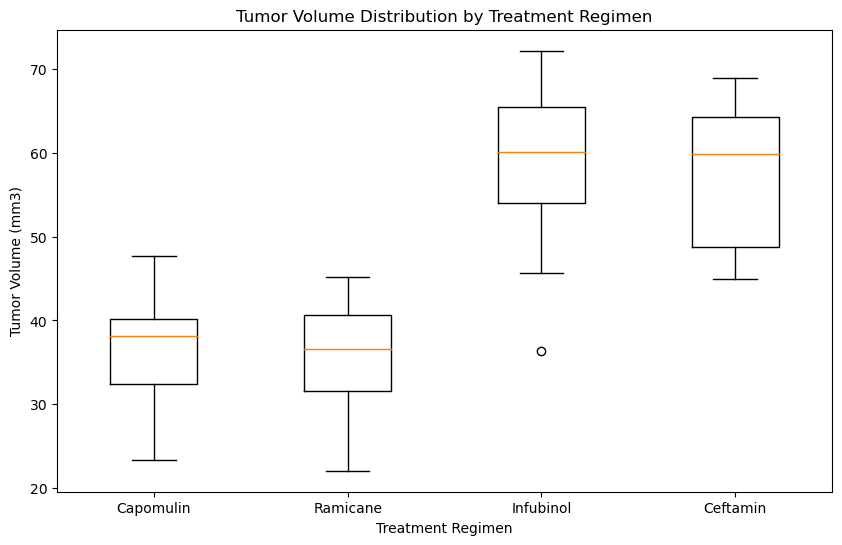

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already read the data into a DataFrame (final_tumor_volume_df)

# Put the treatment regimens into a list for a for loop and plot labels
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for plotting
tumor_volume_data = []

# Loop through each treatment regimen and calculate the IQR and identify potential outliers
for regimen in treatment_regimens:
    # Filter the data for the current regimen
    regimen_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Append the tumor volume data for the current regimen to the list
    tumor_volume_data.append(regimen_data)

# Create a box plot for the tumor volume data
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatment_regimens)
plt.title("Tumor Volume Distribution by Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

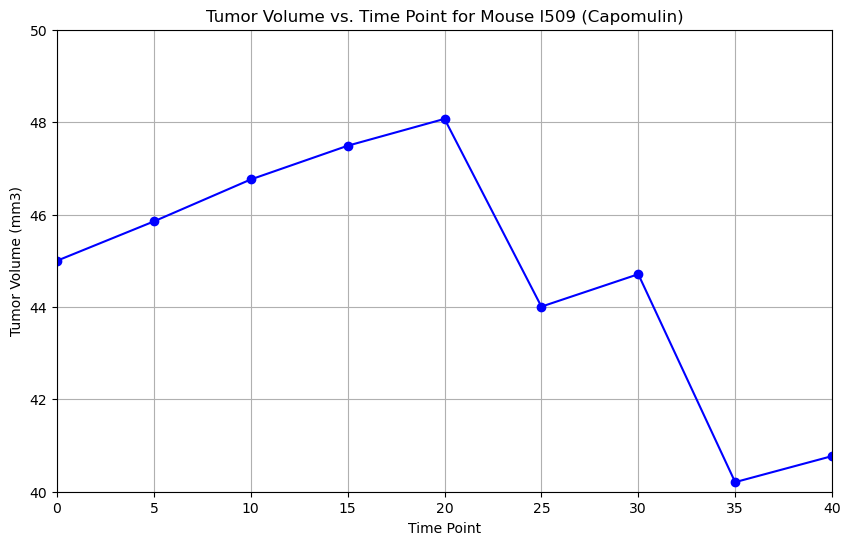

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
231      l509          0           45.000000                 0    Capomulin   
253      l509          5           45.851193                 0    Capomulin   
539      l509         10           46.759074                 0    Capomulin   
881      l509         15           47.488599                 1    Capomulin   
982      l509         20           48.070452                 2    Capomulin   
1146     l509         25           44.006257                 2    Capomulin   
1414     l509         30           44.708055                 2    Capomulin   
1499     l509         35           40.207288                 2    Capomulin   
1723     l509         40           40.770813                 2    Capomulin   
1771     l509         45           41.483008                 3    Capomulin   

       Sex  Age_months  Weight (g)  
231   Male          17          21  
253   Male          17          21  
539   Male         

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files into DataFrames
study_results = pd.read_csv("Study_results.csv")
mouse_meta = pd.read_csv("Mouse_metadata.csv")

# Merge the data using the correct common column "Mouse ID"
merge_df = pd.merge(study_results, mouse_meta, on="Mouse ID", how="left")

# Specify the Mouse ID you want to drop
mouse_to_drop = "g989"

# Drop all rows related to the specified Mouse ID
merge_df = merge_df[merge_df["Mouse ID"] != mouse_to_drop]

# Filter the data for the specified treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
merge_df = merge_df[merge_df['Drug Regimen'].isin(specified_regimens)]

# Select a single mouse treated with Capomulin (replace 'your_mouse_id' with the actual mouse ID)
mouse_id = 'l509'

# Filter the data for the selected mouse treated with Capomulin
capomulin_mouse_data = merge_df[(merge_df['Drug Regimen'] == 'Capomulin') & (merge_df['Mouse ID'] == mouse_id)]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.xlim(0, 40)  # Set the x-axis range from 0 to 40
plt.ylim(40, 50)  # Set the y-axis range from 40 to 48
plt.show()
print(capomulin_mouse_data)

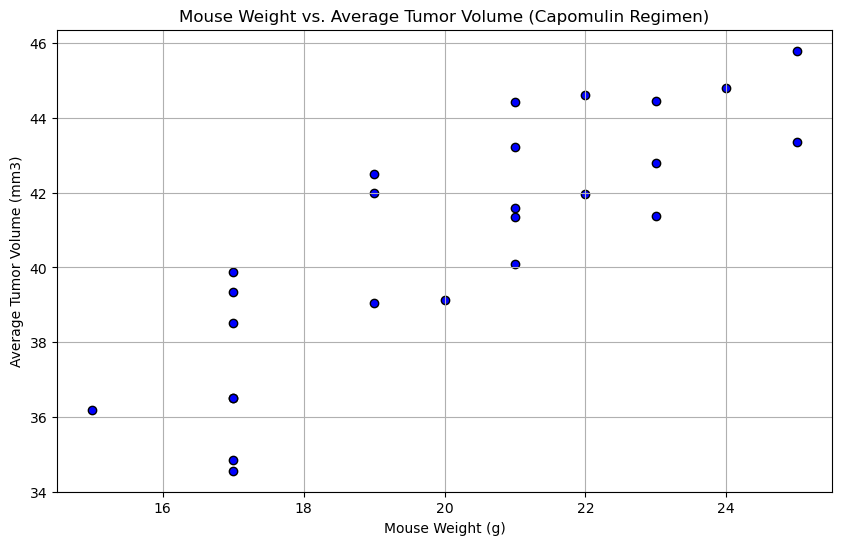

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files into DataFrames
study_results = pd.read_csv("Study_results.csv")
mouse_meta = pd.read_csv("Mouse_metadata.csv")

# Merge the data using the correct common column "Mouse ID"
merge_df = pd.merge(study_results, mouse_meta, on="Mouse ID", how="left")

# Specify the Mouse ID you want to drop
mouse_to_drop = "g989"

# Drop all rows related to the specified Mouse ID
merge_df = merge_df[merge_df["Mouse ID"] != mouse_to_drop]

# Filter the data for the specified treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
merge_df = merge_df[merge_df['Drug Regimen'].isin(specified_regimens)]

# Filter the data for the Capomulin regimen
capomulin_data = merge_df[merge_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='b', edgecolors='black')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

Correlation Coefficient: 0.84


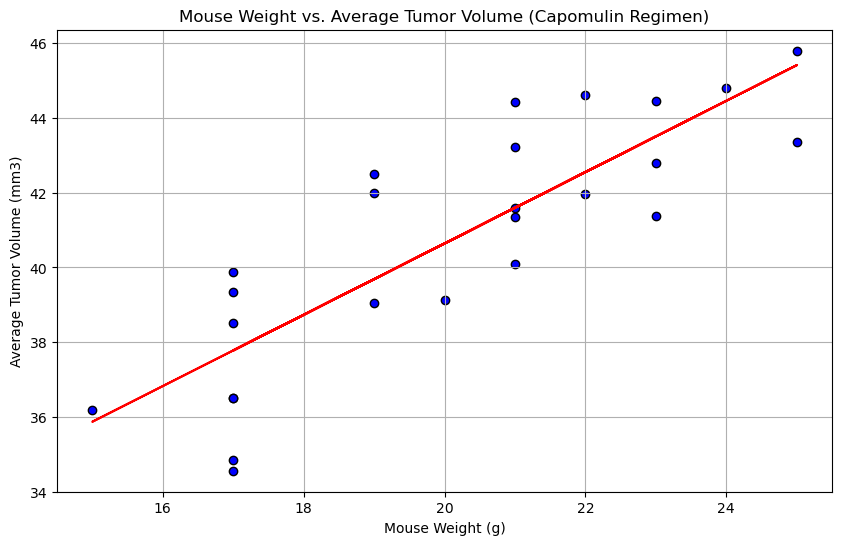

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read the CSV files into DataFrames
study_results = pd.read_csv("Study_results.csv")
mouse_meta = pd.read_csv("Mouse_metadata.csv")

# Merge the data using the correct common column "Mouse ID"
merge_df = pd.merge(study_results, mouse_meta, on="Mouse ID", how="left")

# Specify the Mouse ID you want to drop
mouse_to_drop = "g989"

# Drop all rows related to the specified Mouse ID
merge_df = merge_df[merge_df["Mouse ID"] != mouse_to_drop]

# Filter the data for the Capomulin regimen
capomulin_data = merge_df[merge_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='b', edgecolors='black')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

# Calculate the correlation coefficient
correlation = round(mouse_weight.corr(average_tumor_volume), 2)
print(f"Correlation Coefficient: {correlation}")

# Create a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Calculate the predicted values
predicted_values = slope * mouse_weight + intercept

# Add the regression line to the scatter plot
plt.plot(mouse_weight, predicted_values, color='red')

plt.show()